# support vector muchine(SVM)
- 분류에 해당하는 알고리즘 
- 분류 : 정답값이 존재하지 않는 알고리즘 - 정확도가 존재하지 않음 
- 회귀 : 정답값이 존재하는 알고리즘 - 정확도가 존재

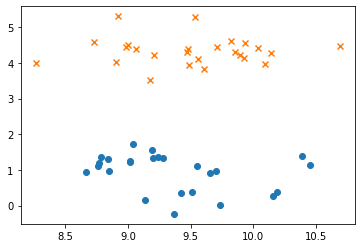

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X,y = make_blobs(n_samples = 50, centers = 2, cluster_std= 0.5, random_state= 4)
y = 2 * y -1

plt.scatter(X[y == -1,0], X[y== -1,1], marker= 'o' )
plt.scatter(X[y == +1,0], X[y== +1,1], marker= 'x' )
plt.show()

In [6]:
from sklearn.svm import SVC
import numpy as np
model = SVC(kernel = 'linear', C = 1e10) #1 x 10^10
model.fit(X,y)

SVC(C=10000000000.0, kernel='linear')

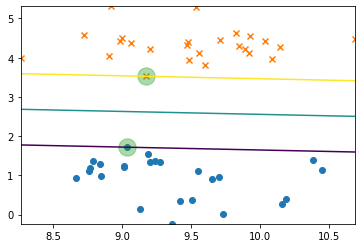

In [13]:
plt.scatter(X[y == -1,0], X[y== -1,1], marker= 'o' )
plt.scatter(X[y == +1,0], X[y== +1,1], marker= 'x' )

xmin = X[:, 0].min()
xmax = X[:, 0].max()
ymin = X[:, 1].min()
ymax = X[:, 1].max()
xx = np.linspace(xmin,xmax, 10)
yy = np.linspace(ymin,ymax, 10)
X1, X2 = np.meshgrid(xx,yy)

Z = np.empty(X1.shape)

for (i,j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i,j]
    p = model.decision_function([[x1,x2]])
    Z[i,j] = p[0]
    
plt.contour(X1,X2,Z,[-1,0,1])
plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:, 1], alpha=0.4, s = 300)
plt.show()

In [14]:
#얼굴 이미지 인식
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Administrator\scikit_learn_data


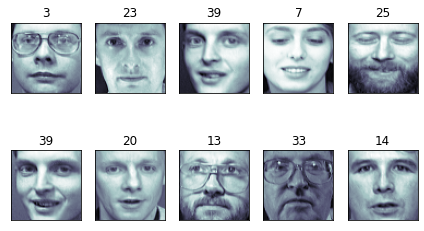

In [34]:
N = 2
M = 5
np.random.seed(1)

fig = plt.figure()
klist = np.random.choice(range(len(faces.data)), N * M)

for i in range(N):
    for j in range(M):
        k = klist[i * M + j]
        ax = fig.add_subplot(N,M, i * M + j + 1)
        ax.imshow(faces.images[k], cmap = plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(faces.target[k])
plt.tight_layout()
plt.show()

In [35]:
#데이터 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target,test_size = 0.4)

#모델 만들기 
from sklearn.svm import SVC

#데이터 학습시키기
svc = SVC(kernel= 'linear').fit(X_train,y_train)

#학습한 결과 확인
from sklearn.metrics import classification_report, accuracy_score

#예측한 결과를 확인(연습문제 결과, 실전문제 결과)
y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)

#연습문제 정답값과 문제를 통해 도출해낸 정답값을 비교
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         4
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         9
          15       1.00      1.00      1.00         9
          16       1.00      1.00      1.00         6
          17       1.00    

In [36]:
#실제 정답값과 문제를 통해 도출해낸 정답값을 비교
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      1.00      1.00         7
           2       0.50      1.00      0.67         3
           3       0.50      1.00      0.67         2
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         5
           7       1.00      0.67      0.80         3
           8       0.67      0.67      0.67         6
           9       1.00      0.67      0.80         6
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         4
          12       1.00      0.67      0.80         6
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         1
          15       0.50      1.00      0.67         1
          16       1.00      1.00      1.00         4
          17       0.80    

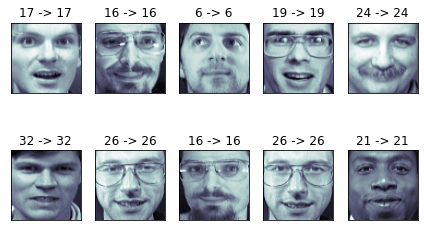

In [40]:
#데이터 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target,test_size = 0.4, random_state= 0)

#모델 만들기 
from sklearn.svm import SVC

#데이터 학습시키기
svc = SVC(kernel= 'linear').fit(X_train,y_train)


N = 2
M = 5
np.random.seed(1)

fig = plt.figure()
klist = np.random.choice(range(len(y_test)), N * M) # 

for i in range(N):
    for j in range(M):
        k = klist[i * M + j]
        ax = fig.add_subplot(N,M, i * M + j + 1)
        ax.imshow(X_test[k:(k+1),:].reshape(64,64), cmap = plt.cm.bone) # 
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("%d -> %d" % (y_test[k], svc.predict(X_test[k:(k+1), :])[0])) #
plt.tight_layout()
plt.show()